# Three level Bloch equations solver

<div style='float:left; width:30%'>
<img src='img/chap7_three_level_three_pro_img.jpeg' style='width:250px;'/>
<center>Progressive regime</center>
</div>

<!---
<div style='float:left; width:30%'>
<img src='img/chap7_three_level_three_pro_img.jpeg' style='width:250px;'/>
<center>Regressive regime lower</center>
</div>
<div style='float:left; width:30%'>
<img src='img/chap7_three_level_three_pro_img.jpeg' style='width:250px;'/>
<center>Regressive regime upper</center>
</div>
<div style='clear:left'></div>
-->

This notebook presents and explains a three level Bloch equation solver. It works with standard python packages including Numpy and SciPy. The theory is summerized quickly in the following. The unperturbed Hamiltonian describing a three level systems is given
by:

\begin{equation}
\hat{\mathcal{H}}_{0}=\begin{pmatrix}E_{a} & 0 & 0\\
0 & E_{b} & 0\\
0 & 0 & E_{c}
\end{pmatrix}
\end{equation}

with $E_{c}>E_{b}>E_{a}$. If all transitions of a three level system
are dipole allowed, three different combinations of driving two transitions
are possible: the progressive regime ($\left|a\right\rangle \rightarrow\left|b\right\rangle $
and $\left|b\right\rangle \rightarrow\left|c\right\rangle $, Figure), the upper regressive regime
($\left|a\right\rangle \rightarrow\left|c\right\rangle $ and $\left|b\right\rangle \rightarrow\left|c\right\rangle $,
Figure) and the lower regressive
regime ($\left|a\right\rangle \rightarrow\left|c\right\rangle $ and
$\left|a\right\rangle \rightarrow\left|b\right\rangle $, Figure).
For the corresponding Hamiltonians including the interactions with
the electromagnetic fields follows in the progressive regime $\hat{\mathcal{H}}_{\text{pro}}$:

\begin{equation}
{\scriptstyle \hat{\mathcal{H}}_{\text{pro}}=\begin{pmatrix}E_{a} & -\frac{1}{2}\mu_{ab}\mathcal{E}_{ab}\left(e^{i\omega_{\text{ab}}t}+e^{-i\omega_{\text{ab}}t}\right) & 0\\
-\frac{1}{2}\mu_{ba}\mathcal{E}_{ba}\left(e^{i\omega_{\text{ab}}t}+e^{-i\omega_{\text{ab}}t}\right) & E_{b} & -\frac{1}{2}\mu_{bc}\mathcal{E}_{bc}\left(e^{i\omega_{\text{bc}}t}+e^{-i\omega_{\text{bc}}t}\right)\\
0 & -\frac{1}{2}\mu_{cb}\mathcal{E}_{cb}\left(e^{i\omega_{\text{bc}}t}+e^{-i\omega_{\text{bc}}t}\right) & E_{c}
\end{pmatrix}}
\end{equation}
in the upper regressive regime $\hat{\mathcal{H}}_{\text{reg,up}}$:
\begin{equation}
{\scriptstyle \hat{\mathcal{H}}_{\text{reg,up}}=\begin{pmatrix}E_{a} & 0 & -\frac{1}{2}\mu_{ac}\mathcal{E}_{ac}\left(e^{i\omega_{\text{ac}}t}+e^{-i\omega_{\text{ac}}t}\right)\\
0 & E_{b} & -\frac{1}{2}\mu_{bc}\mathcal{E}_{bc}\left(e^{i\omega_{\text{bc}}t}+e^{-i\omega_{\text{bc}}t}\right)\\
-\frac{1}{2}\mu_{ca}\mathcal{E}_{ca}\left(e^{i\omega_{\text{ac}}t}+e^{-i\omega_{\text{ac}}t}\right) & -\frac{1}{2}\mu_{cb}\mathcal{E}_{cb}\left(e^{i\omega_{\text{bc}}t}+e^{-i\omega_{\text{bc}}t}\right) & E_{c}
\end{pmatrix}}
\end{equation}
and in the lower regressive regime $\hat{\mathcal{H}}_{\text{reg,low}}$:
\begin{equation}
{\scriptstyle \hat{\mathcal{H}}_{\text{reg,low}}=\begin{pmatrix}E_{a} & -\frac{1}{2}\mu_{ab}\mathcal{E}_{ab}\left(e^{i\omega_{\text{ab}}t}+e^{-i\omega_{\text{ab}}t}\right) & -\frac{1}{2}\mu_{ac}\mathcal{E}_{ac}\left(e^{i\omega_{\text{ac}}t}+e^{-i\omega_{\text{ac}}t}\right)\\
-\frac{1}{2}\mu_{ba}\mathcal{E}_{ba}\left(e^{i\omega_{\text{ab}}t}+e^{-i\omega_{\text{ab}}t}\right) & E_{b} & 0\\
-\frac{1}{2}\mu_{ca}\mathcal{E}_{ca}\left(e^{i\omega_{\text{ac}}t}+e^{-i\omega_{\text{ac}}t}\right) & 0 & E_{c}
\end{pmatrix}}
\end{equation}
A few approximations have been applied to reduce the complexity. First
of all the assumption was made that the interaction volume is small
compared to the wavelength by neglecting the dependence of the electromagnetic
field on the wave vector $\mathbf{k}$. Also the initial phases of
both incoming waves were set to zero. Furthermore, the assumption
is made that the incoming fields $\mathbf{F}_{ab}$, $\mathbf{F}_{bc}$,
$\mathbf{F}_{ac}$ are only coupling to the dipole moment component
$\mu_{ab}$, $\mu_{bc}$, $\mu_{ac}$, respectively. This assumption
is valid for this work, because the transition frequencies are well
separated and the polarization direction of the two incoming waves
is perpendicular to each other in the experimental setup.

The time dependence of the density matrix elements can be obtained
by solving the Liouville equation:

\begin{equation}
i\hbar\frac{\partial\hat{\rho}\left(t\right)}{\partial t}=\left[\hat{\mathcal{H}}\left(t\right),\,\hat{\rho}\left(t\right)\right]
\end{equation}

The resulting ordinary differential equations (ODE) for the three
different regimes are compiled in Appendix ??. The simulation results
in this chapter were obtained using the ODE solver 'zvode' of the
Python package SciPy (citation). The expectation value of the polarization
is then given by:
\begin{equation}
\left\langle \hat{P}\right\rangle =N\cdot Tr\left(\hat{\rho}\hat{\mu}\right)
\end{equation}
with:
\begin{equation}
\hat{\mu}=-\begin{pmatrix}0 & \mu_{ab} & \mu_{ac}\\
\mu_{ba} & 0 & \mu_{bc}\\
\mu_{ca} & \mu_{cb} & 0
\end{pmatrix}
\end{equation}

<!---
## Bloch equations for a progressive regime:

$\left[\begin{matrix}- \frac{i}{\hbar} \left(\frac{F_{ab} \mu_{ab}}{2} \rho_{ab} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right) - \frac{F_{ab} \mu_{ab}}{2} \rho_{ba} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right)\right) & - \frac{i}{\hbar} \left(E_{a} \rho_{ab} - E_{b} \rho_{ab} + \frac{F_{ab} \mu_{ab}}{2} \rho_{aa} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right) - \frac{F_{ab} \mu_{ab}}{2} \rho_{bb} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right) + \frac{F_{bc} \mu_{bc}}{2} \rho_{ac} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right)\right) & - \frac{i}{\hbar} \left(E_{a} \rho_{ac} - E_{c} \rho_{ac} - \frac{F_{ab} \mu_{ab}}{2} \rho_{bc} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right) + \frac{F_{bc} \mu_{bc}}{2} \rho_{ab} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right)\right)\\- \frac{i}{\hbar} \left(- E_{a} \rho_{ba} + E_{b} \rho_{ba} - \frac{F_{ab} \mu_{ab}}{2} \rho_{aa} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right) + \frac{F_{ab} \mu_{ab}}{2} \rho_{bb} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right) - \frac{F_{bc} \mu_{bc}}{2} \rho_{ca} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right)\right) & - \frac{i}{\hbar} \left(- \frac{F_{ab} \mu_{ab}}{2} \rho_{ab} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right) + \frac{F_{ab} \mu_{ab}}{2} \rho_{ba} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right) + \frac{F_{bc} \mu_{bc}}{2} \rho_{bc} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right) - \frac{F_{bc} \mu_{bc}}{2} \rho_{cb} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right)\right) & - \frac{i}{\hbar} \left(E_{b} \rho_{bc} - E_{c} \rho_{bc} - \frac{F_{ab} \mu_{ab}}{2} \rho_{ac} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right) + \frac{F_{bc} \mu_{bc}}{2} \rho_{bb} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right) - \frac{F_{bc} \mu_{bc}}{2} \rho_{cc} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right)\right)\\- \frac{i}{\hbar} \left(- E_{a} \rho_{ca} + E_{c} \rho_{ca} + \frac{F_{ab} \mu_{ab}}{2} \rho_{cb} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right) - \frac{F_{bc} \mu_{bc}}{2} \rho_{ba} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right)\right) & - \frac{i}{\hbar} \left(- E_{b} \rho_{cb} + E_{c} \rho_{cb} + \frac{F_{ab} \mu_{ab}}{2} \rho_{ca} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right) - \frac{F_{bc} \mu_{bc}}{2} \rho_{bb} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right) + \frac{F_{bc} \mu_{bc}}{2} \rho_{cc} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right)\right) & - \frac{i}{\hbar} \left(- \frac{F_{bc} \mu_{bc}}{2} \rho_{bc} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right) + \frac{F_{bc} \mu_{bc}}{2} \rho_{cb} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right)\right)\end{matrix}\right]$

## Bloch equations for a regressive regime (upper):

$\left[\begin{matrix}- \frac{i}{\hbar} \left(\frac{F_{ab} \mu_{ab}}{2} \rho_{ab} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right) - \frac{F_{ab} \mu_{ab}}{2} \rho_{ba} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right) + \frac{F_{ac} \mu_{ac}}{2} \rho_{ac} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right) - \frac{F_{ac} \mu_{ac}}{2} \rho_{ca} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right)\right) & - \frac{i}{\hbar} \left(E_{a} \rho_{ab} - E_{b} \rho_{ab} + \frac{F_{ab} \mu_{ab}}{2} \rho_{aa} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right) - \frac{F_{ab} \mu_{ab}}{2} \rho_{bb} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right) - \frac{F_{ac} \mu_{ac}}{2} \rho_{cb} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right)\right) & - \frac{i}{\hbar} \left(E_{a} \rho_{ac} - E_{c} \rho_{ac} - \frac{F_{ab} \mu_{ab}}{2} \rho_{bc} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right) + \frac{F_{ac} \mu_{ac}}{2} \rho_{aa} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right) - \frac{F_{ac} \mu_{ac}}{2} \rho_{cc} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right)\right)\\- \frac{i}{\hbar} \left(- E_{a} \rho_{ba} + E_{b} \rho_{ba} - \frac{F_{ab} \mu_{ab}}{2} \rho_{aa} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right) + \frac{F_{ab} \mu_{ab}}{2} \rho_{bb} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right) + \frac{F_{ac} \mu_{ac}}{2} \rho_{bc} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right)\right) & - \frac{i}{\hbar} \left(- \frac{F_{ab} \mu_{ab}}{2} \rho_{ab} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right) + \frac{F_{ab} \mu_{ab}}{2} \rho_{ba} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right)\right) & - \frac{i}{\hbar} \left(E_{b} \rho_{bc} - E_{c} \rho_{bc} - \frac{F_{ab} \mu_{ab}}{2} \rho_{ac} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right) + \frac{F_{ac} \mu_{ac}}{2} \rho_{ba} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right)\right)\\- \frac{i}{\hbar} \left(- E_{a} \rho_{ca} + E_{c} \rho_{ca} + \frac{F_{ab} \mu_{ab}}{2} \rho_{cb} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right) - \frac{F_{ac} \mu_{ac}}{2} \rho_{aa} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right) + \frac{F_{ac} \mu_{ac}}{2} \rho_{cc} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right)\right) & - \frac{i}{\hbar} \left(- E_{b} \rho_{cb} + E_{c} \rho_{cb} + \frac{F_{ab} \mu_{ab}}{2} \rho_{ca} \left(e^{i \omega_{ab} t} + e^{- i \omega_{ab} t}\right) - \frac{F_{ac} \mu_{ac}}{2} \rho_{ab} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right)\right) & - \frac{i}{\hbar} \left(- \frac{F_{ac} \mu_{ac}}{2} \rho_{ac} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right) + \frac{F_{ac} \mu_{ac}}{2} \rho_{ca} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right)\right)\end{matrix}\right]$

## Bloch equations for a regressive regime (upper):

$\left[\begin{matrix}- \frac{i}{\hbar} \left(\frac{F_{ac} \mu_{ac}}{2} \rho_{ac} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right) - \frac{F_{ac} \mu_{ac}}{2} \rho_{ca} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right)\right) & - \frac{i}{\hbar} \left(E_{a} \rho_{ab} - E_{b} \rho_{ab} - \frac{F_{ac} \mu_{ac}}{2} \rho_{cb} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right) + \frac{F_{bc} \mu_{bc}}{2} \rho_{ac} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right)\right) & - \frac{i}{\hbar} \left(E_{a} \rho_{ac} - E_{c} \rho_{ac} + \frac{F_{ac} \mu_{ac}}{2} \rho_{aa} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right) - \frac{F_{ac} \mu_{ac}}{2} \rho_{cc} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right) + \frac{F_{bc} \mu_{bc}}{2} \rho_{ab} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right)\right)\\- \frac{i}{\hbar} \left(- E_{a} \rho_{ba} + E_{b} \rho_{ba} + \frac{F_{ac} \mu_{ac}}{2} \rho_{bc} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right) - \frac{F_{bc} \mu_{bc}}{2} \rho_{ca} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right)\right) & - \frac{i}{\hbar} \left(\frac{F_{bc} \mu_{bc}}{2} \rho_{bc} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right) - \frac{F_{bc} \mu_{bc}}{2} \rho_{cb} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right)\right) & - \frac{i}{\hbar} \left(E_{b} \rho_{bc} - E_{c} \rho_{bc} + \frac{F_{ac} \mu_{ac}}{2} \rho_{ba} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right) + \frac{F_{bc} \mu_{bc}}{2} \rho_{bb} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right) - \frac{F_{bc} \mu_{bc}}{2} \rho_{cc} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right)\right)\\- \frac{i}{\hbar} \left(- E_{a} \rho_{ca} + E_{c} \rho_{ca} - \frac{F_{ac} \mu_{ac}}{2} \rho_{aa} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right) + \frac{F_{ac} \mu_{ac}}{2} \rho_{cc} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right) - \frac{F_{bc} \mu_{bc}}{2} \rho_{ba} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right)\right) & - \frac{i}{\hbar} \left(- E_{b} \rho_{cb} + E_{c} \rho_{cb} - \frac{F_{ac} \mu_{ac}}{2} \rho_{ab} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right) - \frac{F_{bc} \mu_{bc}}{2} \rho_{bb} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right) + \frac{F_{bc} \mu_{bc}}{2} \rho_{cc} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right)\right) & - \frac{i}{\hbar} \left(- \frac{F_{ac} \mu_{ac}}{2} \rho_{ac} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right) + \frac{F_{ac} \mu_{ac}}{2} \rho_{ca} \left(e^{i \omega_{ac} t} + e^{- i \omega_{ac} t}\right) - \frac{F_{bc} \mu_{bc}}{2} \rho_{bc} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right) + \frac{F_{bc} \mu_{bc}}{2} \rho_{cb} \left(e^{i \omega_{bc} t} + e^{- i \omega_{bc} t}\right)\right)\end{matrix}\right]$
-->

## Load some modules

In [34]:
# Load some modules
import scipy.constants as con
from scipy.integrate import ode
from scipy import optimize
import copy as cp
from matplotlib.patches import Rectangle
from tempfile import TemporaryFile
import time
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

params = {'axes.labelsize': 14,
          'legend.fontsize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': True,
          'font.size': 14,
          'font.family': 'serif',
          'font.serif': 'serif',
          'figure.figsize': [16,10]}
mpl.rcParams.update(params)

## Define some functions

In [43]:
# This function returns a sin
def fitfunc(t,A, omega, phi):
    
    return A*sin((t)*omega+phi)

'''
This function returns the phase of the cohererences compared to a single frequency om_0 (Hz) starting at t0. 
dt is the timestep
'''
def phase(t, dt, om_0, rho):
    
    om_0 *= (2*np.pi*1.E6)
    signal = (rho.real)[-100:]
    ref = ((np.exp(-1j*(om_0*t-np.pi/2))).real*.1)[-100:]
    time = t[-100:]

    h=1.
    for i in np.arange(0,100):
        if np.sign(signal[i]*h) < 0.:
            g2 = np.abs(signal[i])/(np.abs(h) + np.abs(signal[i]))
            if h < signal[i]:
                ts = time[i]-g2*dt
        h = signal[i]

    h=1.
    for i in np.arange(0,100):
        if np.sign(ref[i]*h) < 0.:
            g2 = np.abs(ref[i])/(np.abs(h) + np.abs(ref[i]))
            if h < ref[i]:
                tr = time[i]-g2*dt
        h = ref[i]

    return (tr-ts)*om_0

In [24]:
# Setting up the differential equations by solving the commutator
def f_3(t, y, arg):
    
    # Make it human readable
    E_a = arg[0]; E_b = arg[1]; E_c = arg[2] 
    mu_ab = arg[3]; mu_bc = arg[4]; mu_ac = arg[5]
    F_ab = arg[6]; F_bc = arg[7]; F_ac = arg[8]
    o_ab = arg[9]; o_bc = arg[10]; o_ac = arg[11]
    phi_ab = arg[12]; phi_bc = arg[13]; phi_ac = arg[14]
    
    # Set up Hamiltonian
    H = np.zeros((3,3), dtype=complex)
    H[0,0] = E_a; H[1,1] = E_b; H[2,2] = E_c;
    
    H[0,1] = - mu_ab * F_ab / 2. * (np.exp(-1.j*(o_ab*t+phi_ab)) + np.exp(1.j*(o_ab*t+phi_ab))); H[1,0] = np.conjugate(H[0,1])
    H[1,2] = - mu_bc * F_bc / 2. * (np.exp(-1.j*(o_bc*t+phi_bc)) + np.exp(1.j*(o_bc*t+phi_bc))); H[2,1] = np.conjugate(H[1,2])
    H[0,2] = - mu_ac * F_ac / 2. * (np.exp(-1.j*(o_ac*t+phi_ac)) + np.exp(1.j*(o_ac*t+phi_ac))); H[2,0] = np.conjugate(H[0,2])
    
    # Set up density matrix
    rho = np.zeros((3,3), dtype=complex)
    rho[0,0] = y[0]; rho[0,1] = y[1]; rho[0,2] = y[2]
    rho[1,0] = y[3]; rho[1,1] = y[4]; rho[1,2] = y[5]
    rho[2,0] = y[6]; rho[2,1] = y[7]; rho[2,2] = y[8]

    # Calculate commutator
    dt_rho = -1.j/con.hbar * ( np.dot(H, rho) - np.dot(rho, H) )
    return [[dt_rho[0,0]], [dt_rho[0,1]], [dt_rho[0,2]], 
            [dt_rho[1,0]], [dt_rho[1,1]], [dt_rho[1,2]], 
            [dt_rho[2,0]], [dt_rho[2,1]], [dt_rho[2,2]]]


In [31]:
# rho is the density matrix at every timestep
# t is the time vector
# This function solves the Bloch equations and carries the full output
def bloch_solver_3(par, dump=True, cut=False, Ndpoints=1000, Ncpoints=1000):

    para = cp.deepcopy(par)
    if dump == True:
        tmpfile_t = TemporaryFile()
        tmpfile_rho = TemporaryFile()
        cut = False
    
    def set_init(para, i):
        return [para['E_a'], para['E_b'], para['E_c'], para['mu_ab'], para['mu_bc'], para['mu_ac'],
                para['F_ab'][i], para['F_bc'][i], para['F_ac'][i], para['o_ab'][i], para['o_bc'][i], para['o_ac'][i],
                para['phi_ab'][i], para['phi_bc'][i], para['phi_ac'][i]]
    
    def save_dump(rho, t, tmpfile_t, tmpfile_rho):
        tmpfile_t.seek(0); tmpfile_rho.seek(0)
        t_h = np.load(tmpfile_t); rho_h = np.load(tmpfile_rho)
        tmpfile_t.seek(0); tmpfile_rho.seek(0)
        rho = np.vstack((rho_h, rho[:-1])); t = np.append(t_h, t[:-1])
        np.save(tmpfile_t, t); np.save(tmpfile_rho, rho)
    
    para['o_ab'] *= (2.*np.pi*1.E6); para['o_bc'] *= (2.*np.pi*1.E6); para['o_ac'] *= (2.*np.pi*1.E6)
    para['mu_ab'] *= 3.335E-30; para['mu_bc'] *= 3.335E-30; para['mu_ac'] *= 3.335E-30


    nb = len(para['tp'])
    r = ode(f_3).set_integrator('zvode')

    for i in np.arange(nb):
        
        # Set parameters and starting values at t0
        if i == 0:
            r.set_initial_value(para['rho0'], para['t0']).set_f_params(set_init(para, 0))
            t = np.array(para['t0'])
            rho = np.array([[[para['rho0'][0], para['rho0'][1], para['rho0'][2]], 
                          [para['rho0'][3], para['rho0'][4], para['rho0'][5]], 
                          [para['rho0'][6], para['rho0'][7], para['rho0'][8]]]])
            tpp = 0.
            
            if dump == True:
                np.save(tmpfile_rho, rho); np.save(tmpfile_t, t)

            
        # Set parameters for the next pulse
        else:
            r.set_initial_value(r.y, r.t).set_f_params(set_init(para, i))
            tpp += para['tp'][i-1]
            
        # Integrate and solve ODEs
        j = 0
        while r.successful() and r.t <= tpp + para['tp'][i]:
            r.integrate(r.t + para['dt'])
            
            if dump == True and j == Ndpoints:
                save_dump(rho, t, tmpfile_t, tmpfile_rho)
                rho = np.array([rho[-1]])
                t = np.array([t[-1]])
                j = 0
                
            if cut == False or r.t > np.sum(para['tp']) - Ncpoints*para['dt']:
                rho = np.vstack((rho, [[[r.y[0], r.y[1], r.y[2]], 
                                     [r.y[3], r.y[4], r.y[5]], 
                                     [r.y[6], r.y[7], r.y[8]]]]))
                t = np.append(t, r.t)
            
            j += 1
        
    if dump == True:
        save_dump(rho, t, tmpfile_t, tmpfile_rho)
        tmpfile_t.seek(0); tmpfile_rho.seek(0)
        rho = np.load(tmpfile_rho); rho = rho[1:] 
        t = np.load(tmpfile_t); t = t[1:]
        tmpfile_rho.close(); tmpfile_t.close()
            
    if cut == False:
        return t, rho
    else:
        return t[1:], rho[1:]

## Here the interactive part starts
First you need to define the parameters:

In [32]:
'''
The par dictionary defines the parameters of the experiment:
dt: timestep
t0: t zero (in seconds)
tp: list of the individual pulse lengths (in seconds)
mu_ij: transitions dipole moments (complex) for the transition |i> to |j> in Debye
E_i: eigen energies of the individual levels |i> (in Joule)
o_ij: radiation frequency (MHz) addressing the particular transition |i> to |j>
F_ij: radiation intensity (V/m) addressing the particular transition |i> to |j>
rho0: starting density matrix (1D array) with entries in the order rho_aa, rho_ab ... rho_ba ... rho_cc
'''

par = dict({ 'dt': 1.E-11, 'tp': np.array([2.60E-8, 2.40E-8, 3.5e-8]),'t0': 0.,
             'mu_ab': 2.+0.j, 'mu_bc': 4.+0.j, 'mu_ac':  1.+0.j,
             'E_a': 0., 'E_b': 2.46037e-24, 'E_c': 2.67492e-24,
             'o_ab': np.array([3713.17, 3713.17, 3713.17]), 'o_bc': np.array([323.8, 323.8, 323.8]), 'o_ac': np.array([4036.97, 4036.97, 4036.97]),
             'F_ab': np.array([1000., 0., 00.]), 'F_bc': np.array([0., 1000., 000.]), 'F_ac': np.array([0., 0., 0.]),
             'phi_ab': np.array([0.,0.,0.]), 'phi_bc': np.array([0.,0.,0.]), 'phi_ac': np.array([0.,0.,0.]),
             'rho0': np.array([.5 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j, 
                          0.0 + 0.0j, 0.3 + 0.0j, 0.0 + 0.0j, 
                          0.0 + 0.0j, 0.0 + 0.0j, 0.2 + 0.0j]),
             })

## Three wave mixing experiment

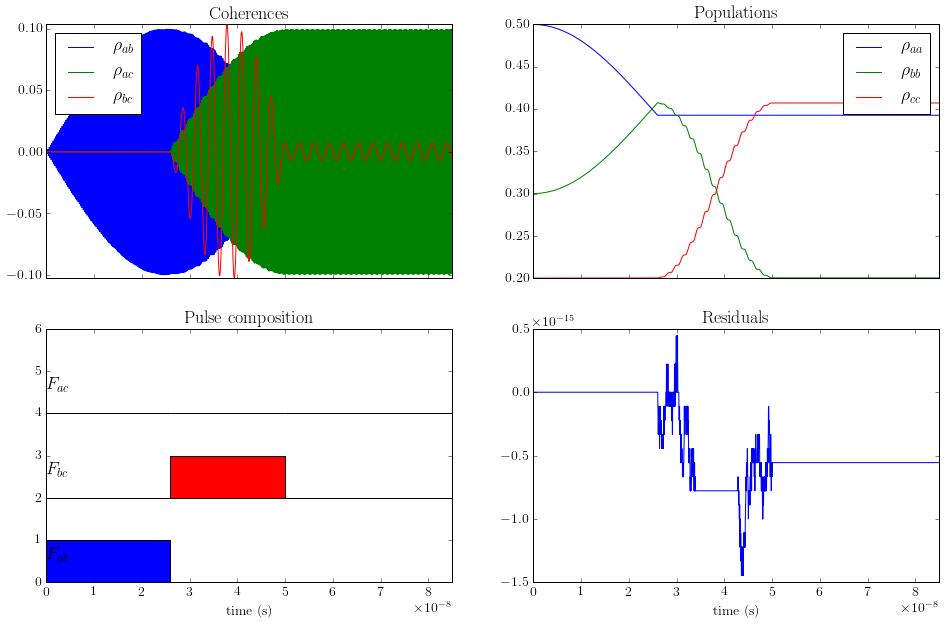

In [37]:
#Solving the Bloch equations
t, rho = bloch_solver_3(par)

# Plotting
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
fig.set_size_inches(16,10)

ma = np.max([np.max(rho[:,0,1].real), np.max(rho[:,0,2].real), np.max(rho[:,1,2].real)])
mi = np.min([np.min(rho[:,0,1].real), np.min(rho[:,0,2].real), np.min(rho[:,1,2].real)])

ax1.set_title('Coherences', fontsize=18)
ax1.plot(t, rho[:,0,1].real, label=r'$\rho_{ab}$')
ax1.plot(t, rho[:,0,2].real, label=r'$\rho_{ac}$')
ax1.plot(t, rho[:,1,2].real, label=r'$\rho_{bc}$')

ax1.legend(loc='upper left', fontsize=18)
ax1.set_xlim(par['t0'], np.sum(par['tp'])); ax1.set_ylim((mi, ma));

ax2.set_title('Populations', fontsize=18)
ax2.plot(t, rho[:,0,0].real, label=r'$\rho_{aa}$')
ax2.plot(t, rho[:,1,1].real, label=r'$\rho_{bb}$')
ax2.plot(t, rho[:,2,2].real, label=r'$\rho_{cc}$')
ax2.legend(fontsize=18)
ax2.set_xlim(par['t0'], np.sum(par['tp']));

ax3.set_title('Pulse composition', fontsize=18)
for i in np.arange(len(par['tp'])):
    m = max([np.max(par['F_ab']), np.max(par['F_ac']), np.max(par['F_bc'])])
    if i == 0:
        x = 0.
    else:
        x += par['tp'][i-1]
    ax3.add_patch(Rectangle((x, 0.), par['tp'][i], par['F_ab'][i]/m, facecolor="blue"))
    ax3.add_patch(Rectangle((x, 4.), par['tp'][i], par['F_ac'][i]/m, facecolor="green"))
    ax3.add_patch(Rectangle((x, 2.), par['tp'][i], par['F_bc'][i]/m, facecolor="red"))

ax3.text(0, .5, r'$F_{ab}$', fontsize=18); ax3.text(0, 2.5, r'$F_{bc}$', fontsize=18); ax3.text(0, 4.5, r'$F_{ac}$', fontsize=18)
ax3.set_xlim(par['t0'], sum(par['tp'])); ax3.set_ylim(0., 6.); ax3.set_xlabel('time (s)')

ax4.set_title('Residuals', fontsize=18)
ax4.plot(t, (rho[:,2,2].real + rho[:,1,1].real + rho[:,0,0].real)-1.)
ax4.set_xlim(par['t0'], sum(par['tp'])); ax4.set_xlabel('time (s)');

## Lets have a look at the Polarizations

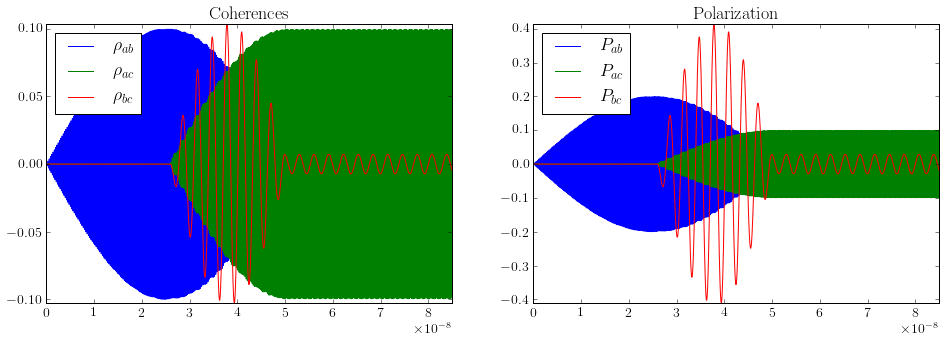

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,5)

ma = np.max([max(rho[:,0,1].real), np.max(rho[:,0,2].real), np.max(rho[:,1,2].real)])
mi = np.min([min(rho[:,0,1].real), np.min(rho[:,0,2].real), np.min(rho[:,1,2].real)])

ax1.set_title('Coherences', fontsize=18)
ax1.plot(t, rho[:,0,1].real, label=r'$\rho_{ab}$')
ax1.plot(t, rho[:,0,2].real, label=r'$\rho_{ac}$')
ax1.plot(t, rho[:,1,2].real, label=r'$\rho_{bc}$')
ax1.legend(loc='upper left', fontsize=18)
ax1.set_xlim(par['t0'], np.sum(par['tp'])); ax1.set_ylim((mi, ma));

mi = min([min((rho[:,0,1]*np.conjugate(par['mu_ab'])).real), 
          min((rho[:,0,2]*np.conjugate(par['mu_ac'])).real), 
          min((rho[:,1,2]*np.conjugate(par['mu_bc'])).real)])

ma = max([max((rho[:,0,1]*np.conjugate(par['mu_ab'])).real), 
          max((rho[:,0,2]*np.conjugate(par['mu_ac'])).real), 
          max((rho[:,1,2]*np.conjugate(par['mu_bc'])).real)])

ax2.set_title('Polarization', fontsize=18)
ax2.plot(t, (rho[:,0,1]*np.conjugate(par['mu_ab'])).real, label=r'$P_{ab}$')
ax2.plot(t, (rho[:,0,2]*np.conjugate(par['mu_ac'])).real, label=r'$P_{ac}$')
ax2.plot(t, (rho[:,1,2]*np.conjugate(par['mu_bc'])).real, label=r'$P_{bc}$')
ax2.legend(loc='upper left', fontsize=18)
ax2.set_xlim(par['t0'], np.sum(par['tp'])); ax2.set_ylim((mi, ma));

## Double resonance experiment with a varying frequency
In this example the frequency o_bc is tuned through the resonance

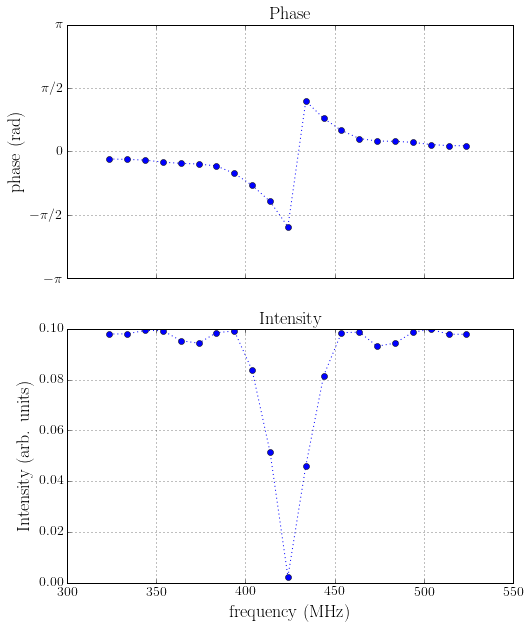

In [45]:
# Define the starting parameters
par = dict({ 'dt': 1.E-11, 'tp': np.array([2.50E-8, 2.5E-8, 1.0E-8]), 't0': 0.,
             'mu_ab': 1.+0.j, 'mu_bc': 1.+0.j, 'mu_ac':  1.+1.j,
             'E_a': 0., 'E_b': 2.460372e-24, 'E_c': 2.674924e-24,
             'o_ab': np.array([3713.17, 3713.17, 3713.17]), 'o_bc': np.array([323.8, 323.8, 323.8]), 'o_ac': np.array([4036.97, 4036.97, 4036.97]),
             'F_ab': np.array([2000., 0.,0.]), 'F_bc': np.array([0., 4000.,0.]), 'F_ac': np.array([0., 0.,0.]),
             'phi_ab': np.array([0.,0.,0.]), 'phi_bc': np.array([0.,0.,0.]), 'phi_ac': np.array([0.,0.,0.]),
             'rho0': np.array([.5 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j, 
                          0.0 + 0.0j, 0.3 + 0.0j, 0.0 + 0.0j, 
                          0.0 + 0.0j, 0.0 + 0.0j, 0.2 + 0.0j]),
             })

# Tune the o_bc frequency and store the phase and the intensity of the o_ab coherence
ph = np.array([])
lint = np.array([])
h = np.array(par['o_bc'])
tune = np.arange(-100,101,10)

for i in tune:
    par['o_bc'] = h + float(i)
    t, rho = bloch_solver_3(par, dump=False, cut=True)
    ph = np.append(ph, phase(t, par['dt'], par['o_ab'][0], rho[:,0,1]))
    lint = np.append(lint, max((rho[:,0,1].real)[-100:]))

# Here the plotting starts
x = par['o_bc'][0] + tune

for i in np.arange(len(ph)):
    if ph[i] > np.pi:
        ph[i] = -np.pi + np.abs(ph[i] - np.pi)
    if ph[i] < -np.pi:
        ph[i] = np.pi - np.abs(ph[i] + np.pi)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(8,10)

ax1.set_title('Phase', fontsize=18)
ax1.plot(x, ph, 'o:')
ax1.set_ylabel('phase (rad)', fontsize=18);
ax1.set_yticks([-np.pi, -np.pi/2, 0., np.pi/2, np.pi])
ax1.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])

ax2.set_title('Intensity', fontsize=18)
ax2.plot(x, lint, 'o:')
ax2.set_xlabel('frequency (MHz)', fontsize=18);
ax2.set_ylabel('Intensity (arb. units)', fontsize=18);

ax1.grid(); ax2.grid();

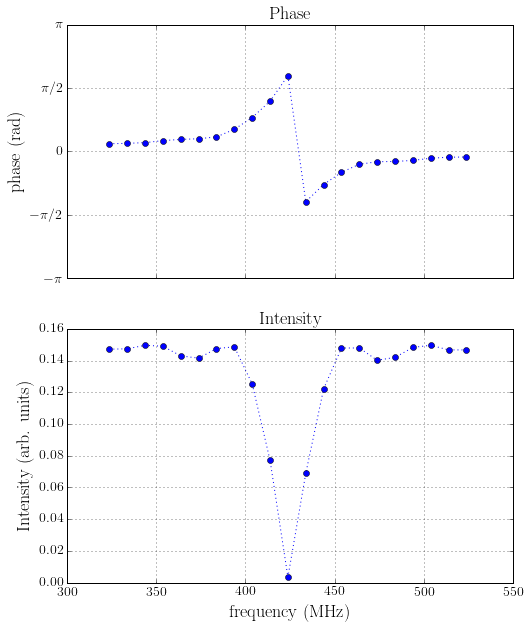

In [48]:
# Define the starting parameters
par = dict({ 'dt': 1.E-11, 'tp': np.array([2.50E-8, 2.5E-8, 1.0E-8]), 't0': 0.,
             'mu_ab': 1.+0.j, 'mu_bc': 1.+0.j, 'mu_ac':  1.+0.j,
             'E_a': 0., 'E_b': 2.460372e-24, 'E_c': 2.674924e-24,
             'o_ab': np.array([3713.17, 3713.17, 3713.17]), 'o_bc': np.array([323.8, 323.8, 323.8]), 'o_ac': np.array([4036.97, 4036.97, 4036.97]),
             'F_ab': np.array([0., 0.,0.]), 'F_bc': np.array([0., 4000.,0.]), 'F_ac': np.array([2000., 0.,0.]),
             'phi_ab': np.array([0.,0.,0.]), 'phi_bc': np.array([0.,0.,0.]), 'phi_ac': np.array([0.,0.,0.]),
             'rho0': np.array([.5 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j, 
                          0.0 + 0.0j, 0.3 + 0.0j, 0.0 + 0.0j, 
                          0.0 + 0.0j, 0.0 + 0.0j, 0.2 + 0.0j]),
             })

# Tune the o_bc frequency and store the phase and the intensity of the o_ac coherence
ph = np.array([])
lint = np.array([])
h = np.array(par['o_bc'])
tune = np.arange(-100,101,10)

for i in tune:
    par['o_bc'] = h + float(i)
    t, rho = bloch_solver_3(par, dump=False, cut=True)
    ph = np.append(ph, phase(t, par['dt'], par['o_ac'][0], rho[:,0,2]))
    lint = np.append(lint, max((rho[:,0,2].real)[-100:]))

# Here the plotting starts
x = par['o_bc'][0] + tune

for i in np.arange(len(ph)):
    if ph[i] > np.pi:
        ph[i] = -np.pi + abs(ph[i] - np.pi)
    if ph[i] < -np.pi:
        ph[i] = np.pi - abs(ph[i] + np.pi)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(8,10)

ax1.set_title('Phase', fontsize=18)
ax1.plot(x, ph, 'o:')
ax1.set_ylabel('phase (rad)', fontsize=18);
ax1.set_yticks([-np.pi, -np.pi/2, 0., np.pi/2, np.pi])
ax1.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])

ax2.set_title('Intensity', fontsize=18)
ax2.plot(x, lint, 'o:')
ax2.set_xlabel('frequency (MHz)', fontsize=18);
ax2.set_ylabel('Intensity (arb. units)', fontsize=18);

ax1.grid(); ax2.grid();

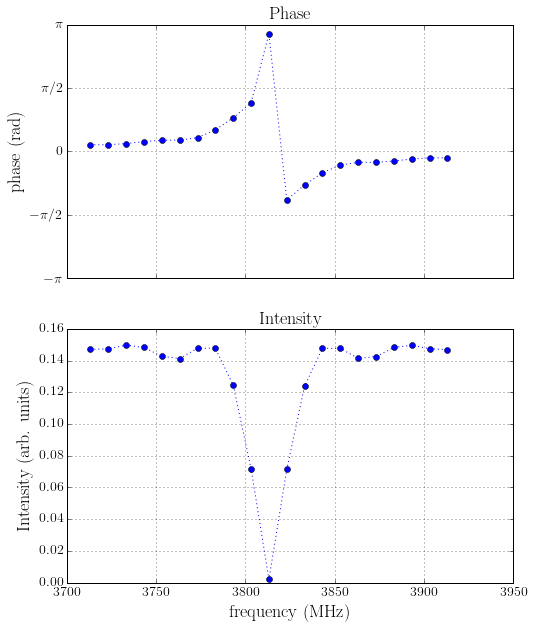

In [49]:
# Define the starting parameters
par = dict({ 'dt': 1.E-11, 'tp': np.array([2.50E-8, 2.5E-8, 1.0E-8]), 't0': 0.,
             'mu_ab': 1.+0.j, 'mu_bc': 1.+0.j, 'mu_ac':  1.+0.j,
             'E_a': 0., 'E_b': 2.460372e-24, 'E_c': 2.674924e-24,
             'o_ab': np.array([3713.17, 3713.17, 3713.17]), 'o_bc': np.array([323.8, 323.8, 323.8]), 'o_ac': np.array([4036.97, 4036.97, 4036.97]),
             'F_ab': np.array([0., 4000.,0.]), 'F_bc': np.array([0., 000.,0.]), 'F_ac': np.array([2000., 0.,0.]),
             'phi_ab': np.array([0.,0.,0.]), 'phi_bc': np.array([0.,0.,0.]), 'phi_ac': np.array([0.,0.,0.]),
             'rho0': np.array([.5 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j, 
                          0.0 + 0.0j, 0.3 + 0.0j, 0.0 + 0.0j, 
                          0.0 + 0.0j, 0.0 + 0.0j, 0.2 + 0.0j]),
             })

# Tune the o_bc frequency and store the phase and the intensity of the o_ac coherence
ph = np.array([])
lint = np.array([])
h = np.array(par['o_ab'])
tune = np.arange(-100,101,10)

for i in tune:
    par['o_ab'] = h + float(i)
    t, rho = bloch_solver_3(par, dump=False, cut=True)
    ph = np.append(ph, phase(t, par['dt'], par['o_ac'][0], rho[:,0,2]))
    lint = np.append(lint, max((rho[:,0,2].real)[-100:]))

# Here the plotting starts
x = par['o_ab'][0] + tune

for i in np.arange(len(ph)):
    if ph[i] > np.pi:
        ph[i] = -np.pi + np.abs(ph[i] - np.pi)
    if ph[i] < -np.pi:
        ph[i] = np.pi - np.abs(ph[i] + np.pi)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(8,10)

ax1.set_title('Phase', fontsize=18)
ax1.plot(x, ph, 'o:')
ax1.set_ylabel('phase (rad)', fontsize=18);
ax1.set_yticks([-np.pi, -np.pi/2, 0., np.pi/2, np.pi])
ax1.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])

ax2.set_title('Intensity', fontsize=18)
ax2.plot(x, lint, 'o:')
ax2.set_xlabel('frequency (MHz)', fontsize=18);
ax2.set_ylabel('Intensity (arb. units)', fontsize=18);

ax1.grid(); ax2.grid();

## Performance check

In [50]:
# Define the starting parameters
par = dict({ 'dt': 1.E-11, 'tp': np.array([2.50E-8, 20.0E-8, 1.E-8]), 't0': 0.,
             'mu_ab': 2.+0.j, 'mu_bc': 1.+0.j, 'mu_ac':  1.+1.j,
             'E_a': 0., 'E_b': 2.460372e-24, 'E_c': 2.674924e-24,
             'o_ab': np.array([3713.17, 3713.17, 3713.17]), 'o_bc': np.array([323.8, 323.8, 323.8]), 'o_ac': np.array([4036.97, 4036.97, 4036.97]),
             'F_ab': np.array([1000., 0.,0]), 'F_bc': np.array([0., 50.,0]), 'F_ac': np.array([0., 0.,0]),
             'phi_ab': np.array([0.,0.,0.]), 'phi_bc': np.array([0.,0.,0.]), 'phi_ac': np.array([0.,0.,0.]),
             'rho0': np.array([.5 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j, 
                          0.0 + 0.0j, 0.3 + 0.0j, 0.0 + 0.0j, 
                          0.0 + 0.0j, 0.0 + 0.0j, 0.2 + 0.0j]),
             })

start = time.time()
t, rho = bloch_solver_3(par, dump=True)
print time.time() - start

start = time.time()
t, rho = bloch_solver_3(par, dump=False, cut=True)
print time.time() - start

start = time.time()
t, rho = bloch_solver_3(par, dump=False)
print time.time() - start

6.00986504555
5.00609612465
22.6084740162


## Autler-Towns splitting

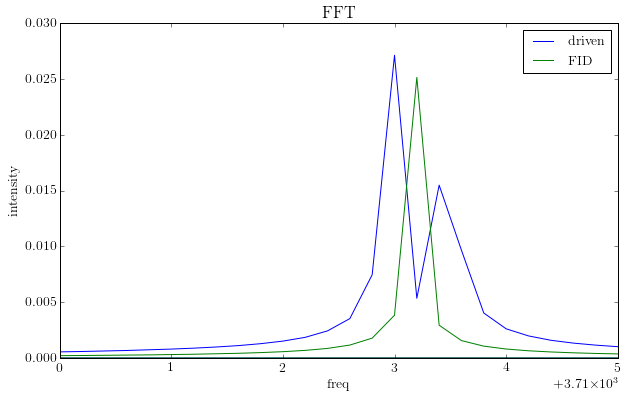

In [51]:
# Define the starting parameters
par = dict({ 'dt': 1.E-11, 'tp': np.array([2.50E-8, 500E-8, 500E-8]), 't0': 0.,
             'mu_ab': 2.+0.j, 'mu_bc': 1.+0.j, 'mu_ac':  1.+1.j,
             'E_a': 0., 'E_b': 2.460372e-24, 'E_c': 2.674924e-24,
             'o_ab': np.array([3713.17, 3713.17, 3713.17]), 'o_bc': np.array([323.8, 323.7, 323.8]), 'o_ac': np.array([4036.97, 4036.97, 4036.97]),
             'F_ab': np.array([1000., 0.,0]), 'F_bc': np.array([0., 100.,0]), 'F_ac': np.array([0., 0.,0]),
             'phi_ab': np.array([0.,0.,0.]), 'phi_bc': np.array([0.,0.,0.]), 'phi_ac': np.array([0.,0.,0.]),
             'rho0': np.array([.5 + 0.0j, 0.0 + 0.0j, 0.0 + 0.0j, 
                          0.0 + 0.0j, 0.3 + 0.0j, 0.0 + 0.0j, 
                          0.0 + 0.0j, 0.0 + 0.0j, 0.2 + 0.0j]),
             })

t, rho = bloch_solver_3(par, dump=True)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,6)

freq_fft = np.fft.fftfreq(len(t[-1000000:-500000]), par['dt'])
fft_fft = np.fft.fft(rho[-1000000:-500000,0,1].real)/len(t)*2.
ax.plot(freq_fft/1E6, np.abs(fft_fft), label='driven')

freq_fft = np.fft.fftfreq(len(t[-500000:]), par['dt'])
fft_fft = np.fft.fft(rho[-500000:,0,1].real*2)/len(t)*2.
ax.plot(freq_fft/1E6, abs(fft_fft), label='FID')
ax.legend()
ax.set_xlim(3710.,3715); ax.set_xlabel('freq'); ax.set_ylabel('intensity'); ax.set_title('FFT')